In [1]:
import pandas as pd

In [2]:
# Read the dataset

file = 'dataset_github/2019/main/labels.csv'
names = ['filename','standard','task2_class','tech_cond','Bathroom','Bathroom cabinet','Bathroom sink','Bathtub','Bed','Bed frame','Bed sheet','Bedroom','Cabinetry','Ceiling','Chair','Chandelier','Chest of drawers','Coffee table','Couch','Countertop','Cupboard','Curtain','Dining room','Door','Drawer','Facade','Fireplace','Floor','Furniture','Grass','Hardwood','House','Kitchen','Kitchen & dining room table','Kitchen stove','Living room','Mattress','Nightstand','Plumbing fixture','Property','Real estate','Refrigerator','Roof','Room','Rural area','Shower','Sink','Sky','Table','Tablecloth','Tap','Tile','Toilet','Tree','Urban area','Wall','Window']
labels_data = pd.read_csv(file, names=names)

In [3]:
print(labels_data.shape)

(2742, 57)


In [4]:
labels_data.head(3)

,filename,standard,task2_class,tech_cond,Bathroom,Bathroom cabinet,Bathroom sink,Bathtub,Bed,Bed frame,...,Sky,Table,Tablecloth,Tap,Tile,Toilet,Tree,Urban area,Wall,Window
0,filename,standard,task2_class,tech_cond,Bathroom,Bathroom cabinet,Bathroom sink,Bathtub,Bed,Bed frame,...,Sky,Table,Tablecloth,Tap,Tile,Toilet,Tree,Urban area,Wall,Window
1,A457DA6E80FFBD81B32136F30E3A90E76374F8E6.jpg,3,validation,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,68CAF64A6D3FE5E4F5190753C9C2D0EA95DC4ECC.jpg,3,validation,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [5]:
# Clean the dataset

labels_data = labels_data.drop(labels=["filename", "standard", "tech_cond", "Bathroom", "Bedroom", "Living room", "Kitchen", "Dining room", "House"], axis=1)

labels_data = labels_data.drop(labels_data.index[0])

labels_data = labels_data[labels_data["task2_class"] !="validation"]

In [6]:
labels_data.head(3)

,task2_class,Bathroom cabinet,Bathroom sink,Bathtub,Bed,Bed frame,Bed sheet,Cabinetry,Ceiling,Chair,...,Sky,Table,Tablecloth,Tap,Tile,Toilet,Tree,Urban area,Wall,Window
552,house,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,house,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,house,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
# Prepare sets for training and validating models

array = labels_data.values

X = array[:,1:]
Y = array[:,0]

validation_size = 0.2
seed = 7
scoring = 'f1_weighted'

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
# Test a few models and compare their results

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.849707 (0.030337)
LDA: 0.834992 (0.027580)
KNN: 0.818447 (0.017601)
CART: 0.832985 (0.028930)
NB: 0.725673 (0.029050)
SVM: 0.830176 (0.031806)


In [10]:
import matplotlib.pyplot as plt

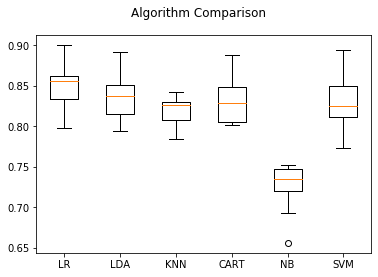

In [11]:
# Compare model algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
# Print data about the chosen model

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.821917808219178
[[53  1  0  0  3  6]
 [ 1 82  4  0  0 14]
 [ 1  0 30  1  0 20]
 [ 0  0  0 33  0  0]
 [ 3  0  1  2 65  4]
 [ 1  2 13  0  1 97]]
              precision    recall  f1-score   support

    bathroom       0.90      0.84      0.87        63
     bedroom       0.96      0.81      0.88       101
 dining_room       0.62      0.58      0.60        52
       house       0.92      1.00      0.96        33
     kitchen       0.94      0.87      0.90        75
 living_room       0.69      0.85      0.76       114

    accuracy                           0.82       438
   macro avg       0.84      0.82      0.83       438
weighted avg       0.84      0.82      0.82       438



In [14]:
# Train model with all the data

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Print a random prediction

print(model.predict(array[-2:-1,1:]))
print(array[-2:-1,0])

['bedroom']
['bedroom']


In [16]:
import pickle

In [17]:
# Save the model as file

model_filename = "task2_model.pkl"  

with open(model_filename, 'wb') as file:  
    pickle.dump(model, file)